<a href="https://colab.research.google.com/github/oatthegreat/project2/blob/main/381_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ol>
   <h1>Project 2</h1>
  <li>Yudava Roopnarine</li>
  <li>Alejandro Mandujano</li>
  <li>Ishrat Amin</li>
  <li>Jonathan Bernard</li>
</ol>

# Dataset on Risk Management in Eastern African Countries

# Data Summary

INFORM is a public forum based in the European Union (EU) that shares analysis regarding various crisis and disasters for humanitarian relief. It’s main product, INFORM RISK, is a generalization of specific areas and their risk of a crisis based on a spectrum of factors pertaining to structural conditions. It is used to help in risk reduction as well as crisis prevention and preparedness. This dataset focuses on the cities in eastern African countries.

This dataset came from the EU website https://drmkc.jrc.ec.europa.eu/inform-index . This data subset contains 146 rows and 30 attributes. Our subset uses only 10 attributes. The dataset attributes are:

- COUNTRY: Country city is in                        
- Physical exposure to flood: risk rating (0-10)       
- Physical exposure to drought: risk rating (0-10)     
- Natural: risk rating (0-10) of earthquakes, floods, tsunamis, tropical cyclones, droughts, epidemics                          
- Political violence: risk rating (0-10)               
- Conflict probability: risk rating (0-10)             
- Human: risk rating (0-10) of conflicts, unrest, or crime                            
- HAZARD: risk rating (0-10) of natural and human causes
- Development & Deprivation: risk rating (0-10)
- Inequality: risk rating (0-10)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Majority of the code used from this project was pulled from M_Fried_M8_assn (1).ipynb given on blackboard, it has been slightly altered to fit this dataset instead of the boston housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/oatthegreat/project2/main/inform-ghoa-2015-v13-16feb-xlsx-1.csv",skiprows=2)
pd.set_option('display.max_columns', None)
df.index += 1
warnings.filterwarnings('ignore')

#drop columns
df.drop('Unnamed: 3',1,inplace = True)
df.drop('(a-z).2',1,inplace = True)
df.drop('(a-z).1',1,inplace = True)
df.drop('(0-10).9',1,inplace = True)
df.drop('(0-10).10',1,inplace = True)
df.drop('(0-10).11',1,inplace = True)
df.drop('(0-10).12',1,inplace = True)
df.drop('(0-10).13',1,inplace = True)
df.drop('(0-10).14',1,inplace = True)
df.drop('(0-10).15',1,inplace = True)
df.drop('(0-10).16',1,inplace = True)
df.drop('(0-10).17',1,inplace = True)
df.drop('(0-10).18',1,inplace = True)
df.drop('(0-10).19',1,inplace = True)
df.drop('(0-10).20',1,inplace = True)
df.drop('(0-10).21',1,inplace = True)
df.drop('(0-10).22',1,inplace = True)
df.drop('(0-10).23',1,inplace = True)
df.drop('(0-10).24',1,inplace = True)
df.drop('(0-10).25',1,inplace = True)
df.drop('Unnamed: 25',1,inplace = True)
df.drop('Unnamed: 28',1,inplace = True)
df.drop('Unnamed: 30',1,inplace = True)


df.columns = ['COUNTRY', 'Physical_exposure_to_flood', 'Physical_exposure_to_drought', 'Natural','Political_violence', 'Conflict_probability', 'Human', 'HAZARD', 'Development_&_Deprivation', 'Inequality']


df.describe()
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,COUNTRY,Physical_exposure_to_flood,Physical_exposure_to_drought,Natural,Political_violence,Conflict_probability,Human,HAZARD,Development_&_Deprivation,Inequality
1,Burundi,3.9,4.8,4.3,3.6,4.7,3.3,3.8,8.5,4.0
2,Burundi,3.9,4.8,4.3,3.6,4.7,3.3,3.8,6.5,3.4
3,Burundi,3.9,4.8,4.3,3.6,4.7,3.3,3.8,8.5,4.0
4,Burundi,3.9,4.8,4.3,0.3,4.7,3.3,3.8,7.9,3.9
5,Burundi,3.9,4.8,4.3,0.0,4.7,3.3,3.8,8.3,3.9


# EDA

Categorical data will use count plots while Numerical data will use box plots.

Numerical Data using box plots will be used the Overall Risk Index which is on a scale of 0 - 10

## Attribute 1: City Count

There are 10 countries in the data set.

The Majority of the cities in the data set are in Kenya, while the country with the least amount of cities tied between Rwanda and Djibouti.

count       146
unique       10
top       Kenya
freq         47
Name: COUNTRY, dtype: object


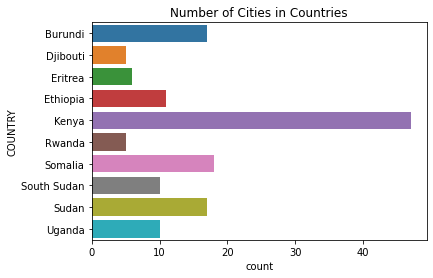

In [ ]:
plt1_sns = sns.countplot(data=df, y="COUNTRY").set(title='Number of Cities in Countries') # Graph for EDA
plt1_sns;
print(df["COUNTRY"].describe()) # Describe to show stats

## Attribute 2: Physical Exposure to Flood

The mean of the cities that have a physical exposure to floods is around a 7.0 on the Overall Risk Index.

The majority of the cities are between 4 and 10.

The Max has a value of 10 while the min has a value of 0.

count    146.000000
mean       7.063699
std        3.291910
min        0.000000
25%        3.900000
50%        8.450000
75%       10.000000
max       10.000000
Name: Physical_exposure_to_flood, dtype: float64


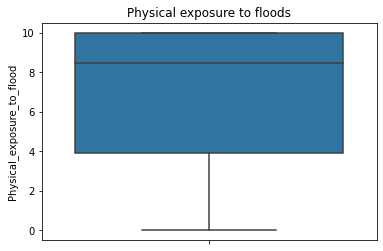

In [ ]:
plt2_sns = sns.boxplot(data=df, y="Physical_exposure_to_flood").set(title="Physical exposure to floods") # Graph for EDA
plt2_sns;
print(df["Physical_exposure_to_flood"].describe()) # Describe to show stats

## Attribute 3: Physical exposure to drought

The mean of the cities that have a physical exposure to droughts is around a 5.0 on the Overall Risk Index.

The majority of the cities are between 4 and 7.

The Max has a value of 9.3 while the min has a value of 0.

count    146.000000
mean       5.039726
std        2.141526
min        0.000000
25%        3.925000
50%        5.750000
75%        6.600000
max        9.300000
Name: Physical_exposure_to_drought, dtype: float64


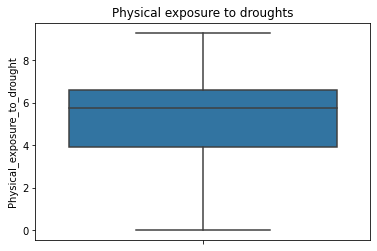

In [ ]:
plt3_sns = sns.boxplot(data=df, y="Physical_exposure_to_drought").set(title="Physical exposure to droughts") # Graph for EDA
plt3_sns;
print(df["Physical_exposure_to_drought"].describe()) # Describe to show stats

## Attribute 4: Natural

The mean of the cities that have a natural exposure is around a 6.5 on the Overall Risk Index.

The majority of the cities are between 4 and 8.5.

The Max has a value of 9.2 while the min has a value of 0.

count    146.000000
mean       6.594521
std        2.203094
min        0.000000
25%        4.425000
50%        7.600000
75%        8.400000
max        9.200000
Name: Natural, dtype: float64


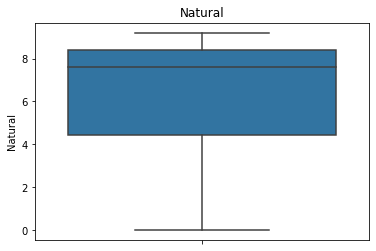

In [ ]:
plt4_sns = sns.boxplot(data=df, y="Natural").set(title="Natural") # Graph for EDA
plt4_sns;
print(df["Natural"].describe()) # Describe to show stats

## Attribute 5: Political Violence

The mean of the cities that have a risk of political violence is around a 4.8 on the Overall Risk Index.

The majority of the cities are between 1 and 10 on the Overall Risk Index.

The Max has a value of 10 while the min has a value of 0.

count    146.000000
mean       4.851370
std        3.943362
min        0.000000
25%        0.725000
50%        3.600000
75%       10.000000
max       10.000000
Name: Political_violence, dtype: float64


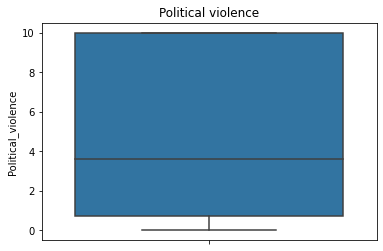

In [ ]:
plt5_sns = sns.boxplot(data=df, y="Political_violence").set(title="Political violence") # Graph for EDA
plt5_sns;
print(df["Political_violence"].describe()) # Describe to show stats

## Attribute 6: Conflict Probability

The mean of the cities that have a risk of a general conflict is around a 7.3 on the Overall Risk Index.

The majority of the cities are between 5.2 and 9.5 on the Overall Risk Index.

The Max has a value of 10 while the min has a value of 0.6.

count    146.000000
mean       7.331507
std        2.760029
min        0.600000
25%        5.200000
50%        8.400000
75%        9.500000
max       10.000000
Name: Conflict_probability, dtype: float64


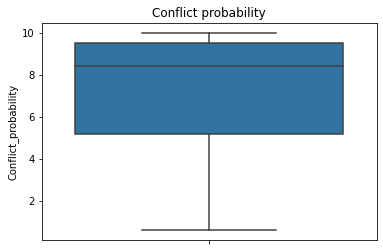

In [ ]:
plt6_sns = sns.boxplot(data=df, y="Conflict_probability").set(title="Conflict probability") # Graph for EDA
plt6_sns;
print(df["Conflict_probability"].describe()) # Describe to show stats

## Attribute 7: Human

The mean of the cities that have a human risk is around a 6.3 on the Overall Risk Index.

The majority of the cities are between 3.6 and 10 on the Overall Risk Index.

The Max has a value of 10 while the min has a value of 0.4.

count    146.000000
mean       6.306849
std        2.975432
min        0.400000
25%        3.600000
50%        6.400000
75%       10.000000
max       10.000000
Name: Human, dtype: float64


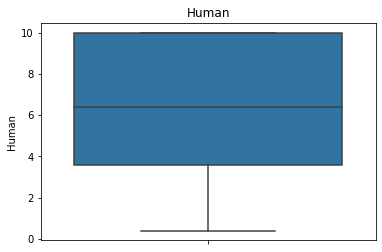

In [ ]:
plt7_sns = sns.boxplot(data=df, y="Human").set(title="Human") # Graph for EDA
plt7_sns;
print(df["Human"].describe()) # Describe to show stats

## Attribute 8: Hazard

The mean of the cities that have a hazard risk is around a 6.6 on the Overall Risk Index.

The majority of the cities are between 5.4 and 8.4 on the Overall Risk Index.

The Max has a value of 9.6 while the min has a value of 0.6.

count    146.000000
mean       6.673288
std        2.305923
min        0.600000
25%        5.425000
50%        7.150000
75%        8.450000
max        9.600000
Name: HAZARD, dtype: float64


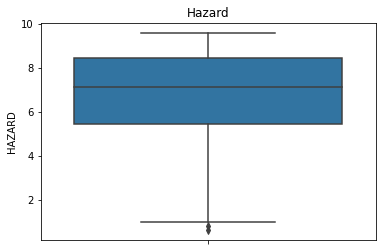

In [ ]:
plt8_sns = sns.boxplot(data=df, y="HAZARD").set(title="Hazard") # Graph for EDA
plt8_sns;
print(df["HAZARD"].describe()) # Describe to show stats

## Attribute 9: Development & Deprivation

The mean of the cities that have a Development and Deprivation risk is around a 7 on the Overall Risk Index.

The majority of the cities are between 5.6 and 8.8 on the Overall Risk Index.

The Max has a value of 9.6 while the min has a value of 2.8.

count    146.000000
mean       7.034932
std        1.644283
min        2.800000
25%        5.600000
50%        6.600000
75%        8.800000
max        9.600000
Name: Development_&_Deprivation, dtype: float64


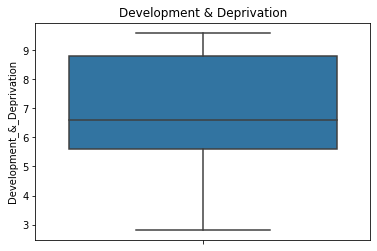

In [ ]:
plt9_sns = sns.boxplot(data=df, y="Development_&_Deprivation").set(title="Development & Deprivation") # Graph for EDA
plt9_sns;
print(df["Development_&_Deprivation"].describe()) # Describe to show stats

## Attribute 10: Inequality

The mean of the cities that have a Development and Deprivation risk is around a 7 on the Overall Risk Index.

The majority of the cities are between 5.6 and 8.8 on the Overall Risk Index.

count     146
unique     34
top       5.5
freq       18
Name: Inequality, dtype: object


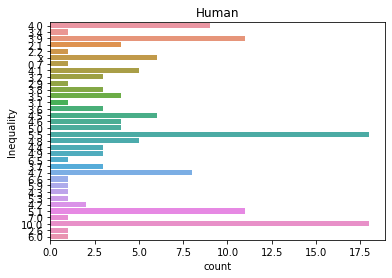

In [ ]:
plt10_sns = sns.countplot(data=df, y="Inequality").set(title="Human") # Graph for EDA
plt10_sns;
print(df["Inequality"].describe()) # Describe to show stats

In [ ]:
df.dtypes

COUNTRY                          object
Physical_exposure_to_flood      float64
Physical_exposure_to_drought    float64
Natural                         float64
Political_violence              float64
Conflict_probability            float64
Human                           float64
HAZARD                          float64
Development_&_Deprivation       float64
Inequality                       object
dtype: object

# Data Cleaning
#Handling missing datas

In [ ]:
#check how many values are null
df.isnull().sum()

COUNTRY                         0
Physical_exposure_to_flood      0
Physical_exposure_to_drought    0
Natural                         0
Political_violence              0
Conflict_probability            0
Human                           0
HAZARD                          0
Development_&_Deprivation       0
Inequality                      0
dtype: int64

In [ ]:

#Check the types of column
df.dtypes

COUNTRY                          object
Physical_exposure_to_flood      float64
Physical_exposure_to_drought    float64
Natural                         float64
Political_violence              float64
Conflict_probability            float64
Human                           float64
HAZARD                          float64
Development_&_Deprivation       float64
Inequality                       object
dtype: object

In [ ]:
#We can see that Inequality column has object type,Which is impossible to have because when we look at our dataframe 
#Inequality has numerical values.We have to fixed this issue.

df["Inequality"].unique()

array(['4.0', '3.4', '3.9', '2.1', '2.2', 'x', '0.7', '4.1', '3.2', '2.9',
       '3.8', '3.5', '3.1', '3.6', '4.5', '4.6', '5.0', '5.5', '4.8',
       '4.4', '4.9', '6.5', '3.7', '4.7', '6.6', '5.9', '4.3', '5.3',
       '4.2', '5.1', '7.0', '10.0', '2.6', '6.0'], dtype=object)

In [ ]:
#There is some kind of x exist in Ineuality column.Now we will see how many "x" exist in Ineuality column.
df["Inequality"].value_counts()

5.5     18
10.0    18
5.1     11
3.9     11
4.0      9
4.7      8
x        6
4.5      6
4.1      5
4.8      5
5.0      4
2.1      4
3.5      4
4.6      4
3.7      3
4.9      3
4.4      3
3.2      3
3.8      3
3.6      3
4.2      2
3.4      1
5.3      1
2.6      1
7.0      1
2.2      1
5.9      1
4.3      1
6.6      1
2.9      1
6.5      1
3.1      1
0.7      1
6.0      1
Name: Inequality, dtype: int64

In [ ]:
#Changing the datatype of Ineuality column and Filling the "x"
df["Inequality"].replace("x",np.nan , inplace =True)
df["Inequality"] = df["Inequality"].astype("float")



In [ ]:
df["Inequality"].fillna(df["Inequality"].mean(),inplace = True)

In [ ]:
#Checkeing the dtype again
df.dtypes

COUNTRY                          object
Physical_exposure_to_flood      float64
Physical_exposure_to_drought    float64
Natural                         float64
Political_violence              float64
Conflict_probability            float64
Human                           float64
HAZARD                          float64
Development_&_Deprivation       float64
Inequality                      float64
dtype: object

#Handling Categorical data

In [ ]:
df_cat = df.select_dtypes(object)


df_cat["COUNTRY"].value_counts()

Kenya          47
Somalia        18
Burundi        17
Sudan          17
Ethiopia       11
South Sudan    10
Uganda         10
Eritrea         6
Djibouti        5
Rwanda          5
Name: COUNTRY, dtype: int64

In [ ]:
df_cat.head()

In [ ]:
#Created a column of each country
pd.get_dummies(df_cat["COUNTRY"])

,Burundi,Djibouti,Eritrea,Ethiopia,Kenya,Rwanda,Somalia,South Sudan,Sudan,Uganda
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,0,0,0,0,1
143,0,0,0,0,0,0,0,0,0,1
144,0,0,0,0,0,0,0,0,0,1
145,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Do you think it is a good option? It did created 10 columns.Now the dataframe is huge.
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df_cat["COUNTRY"])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
df_num = df.select_dtypes(["float64"])

In [ ]:
from scipy.stats import skew

Physical_exposure_to_flood
-0.8419942497886468


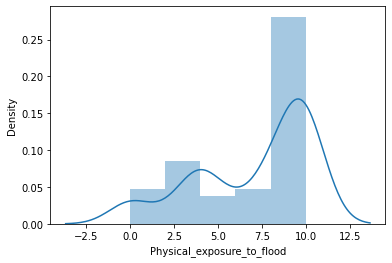

Physical_exposure_to_drought
-0.7703295528872788


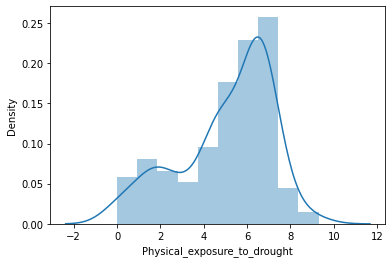

Natural
-0.84292031003524


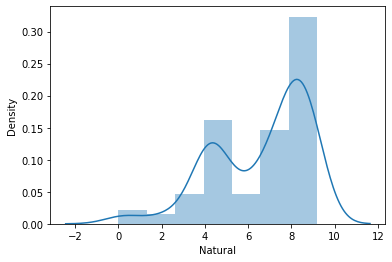

Political_violence
0.15382951207218798


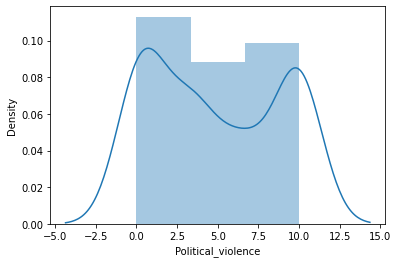

Conflict_probability
-1.199685682689697


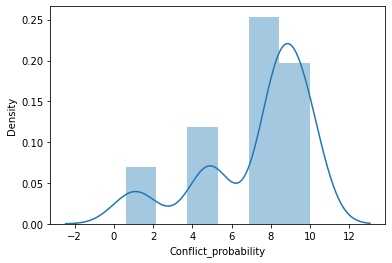

Human
-0.2969826440304087


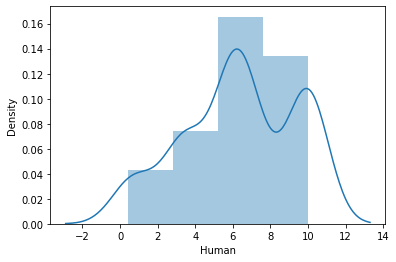

HAZARD
-0.677871635376688


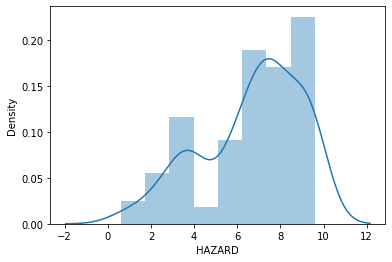

Development_&_Deprivation
-0.06114571408138819


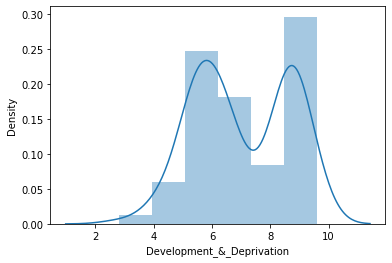

Inequality
1.3800059219474934


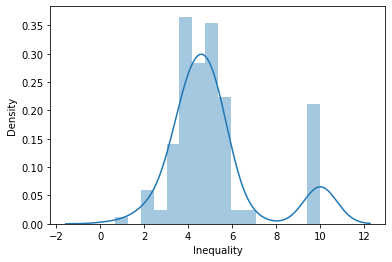

In [ ]:
for col in df_num:
    print(col)
    print(skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

In [ ]:
# show dataset summary statistics
df.describe()

,Physical_exposure_to_flood,Physical_exposure_to_drought,Natural,Political_violence,Conflict_probability,Human,HAZARD,Development_&_Deprivation,Inequality
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,7.063699,5.039726,6.594521,4.851370,7.331507,6.306849,6.673288,7.034932,5.140000
std,3.291910,2.141526,2.203094,3.943362,2.760029,2.975432,2.305923,1.644283,2.042946
min,0.000000,0.000000,0.000000,0.000000,0.600000,0.400000,0.600000,2.800000,0.700000
25%,3.900000,3.925000,4.425000,0.725000,5.200000,3.600000,5.425000,5.600000,3.925000
50%,8.450000,5.750000,7.600000,3.600000,8.400000,6.400000,7.150000,6.600000,4.700000
75%,10.000000,6.600000,8.400000,10.000000,9.500000,10.000000,8.450000,8.800000,5.500000
max,10.000000,9.300000,9.200000,10.000000,10.000000,10.000000,9.600000,9.600000,10.000000


In [ ]:
# view correlation matrix for the variables in the dataset
corrMatrix = df.corr()

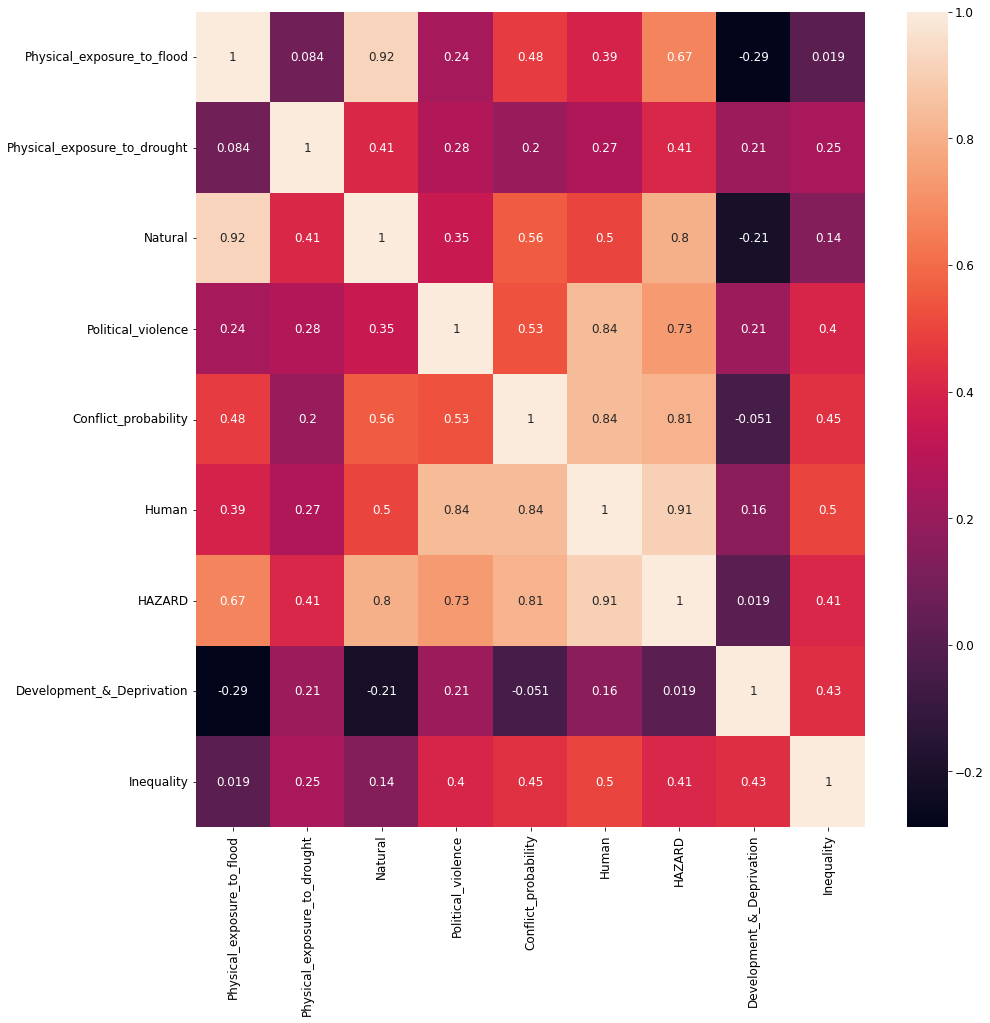

In [ ]:
# show visual representation of the correlation matrix
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,15)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

In [ ]:
df_new = pd.concat([df_num , df_cat], axis = 1)
df_new.head()

,Physical_exposure_to_flood,Physical_exposure_to_drought,Natural,Political_violence,Conflict_probability,Human,HAZARD,Development_&_Deprivation,Inequality,COUNTRY
1,3.9,4.8,4.3,3.6,4.7,3.3,3.8,8.5,4.0,Burundi
2,3.9,4.8,4.3,3.6,4.7,3.3,3.8,6.5,3.4,Burundi
3,3.9,4.8,4.3,3.6,4.7,3.3,3.8,8.5,4.0,Burundi
4,3.9,4.8,4.3,0.3,4.7,3.3,3.8,7.9,3.9,Burundi
5,3.9,4.8,4.3,0.0,4.7,3.3,3.8,8.3,3.9,Burundi


# Trees

In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

print(df)

In [ ]:
d = {'Burundi': 0, 'Djibouti': 1, 'Eritrea': 2, 'Ethiopia': 3, 'Kenya': 4, 'Rwanda': 5, 'Somalia': 6, 'South Sudan': 7, 'Sudan': 8, 'Uganda': 9}
df['COUNTRY'] = df['COUNTRY'].map(d)

In [ ]:
features = ['COUNTRY','Physical_exposure_to_flood','Physical_exposure_to_drought','Natural','Political_violence','Conflict_probability','Human','HAZARD','Development_&_Deprivation']

X = df[features]
y = df['COUNTRY']

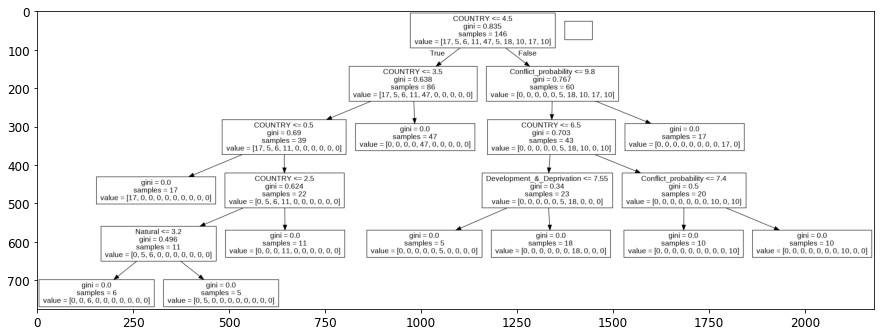

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

# Feature

In [ ]:
#we now do basic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#choose some columns for our regression model
call = df[['Physical_exposure_to_drought','Physical_exposure_to_flood','Political_violence','HAZARD']].copy()
call.head()

,Physical_exposure_to_drought,Physical_exposure_to_flood,Political_violence,HAZARD
1,4.8,3.9,3.6,3.8
2,4.8,3.9,3.6,3.8
3,4.8,3.9,3.6,3.8
4,4.8,3.9,0.3,3.8
5,4.8,3.9,0.0,3.8


In [ ]:
#we cannot use INCIDENT_TIME unless we change the format of it
#we assign unique identifiers
#it 'looks' like it is ordered now, which may or may not be true
from sklearn.preprocessing import LabelEncoder as le 

label = le()
call['Physical_exposure_to_drought'] = label.fit_transform(call['Physical_exposure_to_drought'])
call.head()

,Physical_exposure_to_drought,Physical_exposure_to_flood,Political_violence,HAZARD
1,28,3.9,3.6,3.8
2,28,3.9,3.6,3.8
3,28,3.9,3.6,3.8
4,28,3.9,0.3,3.8
5,28,3.9,0.0,3.8


In [ ]:
#we need to change the borough and radia code
#there is no ordering here, so we use get_dummies to create categories for each
#we have increased the features for each category
call = pd.get_dummies(call)
call.head()

,Physical_exposure_to_drought,Physical_exposure_to_flood,Political_violence,HAZARD
1,28,3.9,3.6,3.8
2,28,3.9,3.6,3.8
3,28,3.9,3.6,3.8
4,28,3.9,0.3,3.8
5,28,3.9,0.0,3.8


In [ ]:
#we now do basic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#A STICKING POINT: when using LinearRegression, sklearn says that X must be 2d
#for some suggestions either just make X 2D by adding variables, or
X = call[['Physical_exposure_to_drought','Physical_exposure_to_flood']]
y = call['HAZARD']

#25% of the data is set aside to test the model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .25)

In [ ]:
#set up the regression
lm = LinearRegression()
lm.fit(X_train, y_train)

#check the r-square on the data
lm.score(X_train,y_train)

0.555261849001498

In [ ]:
#let's now see how it performs on test data
y_pred = lm.predict(X_test)
print(y_pred)

[5.27493076 8.52198839 8.01358176 7.98882413 5.27493076 7.77794666
 5.41131653 5.27493076 4.27679513 5.27493076 8.63361652 9.08012908
 8.42085826 7.55049118 7.07082259 8.68943059 7.34591253 6.08904617
 8.63361652 4.96502278 8.57780245 8.52198839 5.41131653 5.27493076
 8.20578159 2.65818712 4.27679513 7.13105466 8.01966176 5.63247321
 4.14207136 7.34989293 7.14553308 5.27493076 8.01358176 5.27493076
 5.02879766]


In [ ]:
#find the r-sqaure by testing on the training data
r2_score(y_test,y_pred)

0.6241220589502363

#Logistic regression (Logit) model

In [ ]:
import statsmodels.api as sm

#define response variable
y = df['Inequality']

#define predictor variables
x = df[['Physical_exposure_to_flood', 'Physical_exposure_to_drought','Natural','Political_violence','Conflict_probability','Human','HAZARD','Development_&_Deprivation']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Inequality   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     13.12
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           6.04e-14
Time:                        06:25:22   Log-Likelihood:                -269.44
No. Observations:                 146   AIC:                             556.9
Df Residuals:                     137   BIC:                             583.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Knn and SVM models

In [ ]:
df.head()

,COUNTRY,Physical_exposure_to_flood,Physical_exposure_to_drought,Natural,Political_violence,Conflict_probability,Human,HAZARD,Development_&_Deprivation,Inequality
1,0,3.9,4.8,4.3,3.6,4.7,3.3,3.8,8.5,4.0
2,0,3.9,4.8,4.3,3.6,4.7,3.3,3.8,6.5,3.4
3,0,3.9,4.8,4.3,3.6,4.7,3.3,3.8,8.5,4.0
4,0,3.9,4.8,4.3,0.3,4.7,3.3,3.8,7.9,3.9
5,0,3.9,4.8,4.3,0.0,4.7,3.3,3.8,8.3,3.9


In [ ]:
#We check our non-binary categorical data

In [ ]:
df.Conflict_probability.value_counts()

8.4     47
9.5     18
4.7     17
10.0    17
8.1     11
9.6     10
5.2     10
1.6      6
0.6      5
1.0      5
Name: Conflict_probability, dtype: int64

In [ ]:
df.Human.value_counts()

10.0    41
5.9     22
3.3     17
6.4     16
3.6      9
7.0      7
5.6      6
1.1      5
0.4      5
0.7      5
6.6      4
6.7      1
7.3      1
6.3      1
8.0      1
9.6      1
7.9      1
8.3      1
7.8      1
8.2      1
Name: Human, dtype: int64

In [ ]:
#do OneHotEncoder for non-binary categorical data
Conflict_probability = pd.get_dummies(df['Conflict_probability'])
human = pd.get_dummies(df['Human'])
ohe_df = df.filter(['COUNTRY','Physical_exposure_to_flood','Physical_exposure_to_drought','Natural','Political_violence','Conflict_probability','Human','HAZARD','Development_&_Deprivation	'], axis = 1)
Conflict_probability.columns = ['cpc1','cpc2','cpc3','cpc4','cpc5','cpc6','cpc7','cpc8','cpc9','cpc10']
ohe_df = ohe_df.join(Conflict_probability)
human.columns = ['h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20']
ohe_df = ohe_df.join(human)
ohe_df.head()

,COUNTRY,Physical_exposure_to_flood,Physical_exposure_to_drought,Natural,Political_violence,Conflict_probability,Human,HAZARD,cpc1,cpc2,cpc3,cpc4,cpc5,cpc6,cpc7,cpc8,cpc9,cpc10,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20
1,0,3.9,4.8,4.3,3.6,4.7,3.3,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3.9,4.8,4.3,3.6,4.7,3.3,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,3.9,4.8,4.3,3.6,4.7,3.3,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3.9,4.8,4.3,0.3,4.7,3.3,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,3.9,4.8,4.3,0.0,4.7,3.3,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#use Gelman strategy for normalization
g_df=(ohe_df-ohe_df.mean())/(2*ohe_df.std())

theDir = (ohe_df['Physical_exposure_to_flood'] - ohe_df['Physical_exposure_to_flood'].mean())/ohe_df['Physical_exposure_to_flood'].std()
theHir = (ohe_df['Physical_exposure_to_drought'] - ohe_df['Physical_exposure_to_drought'].mean())/ohe_df['Physical_exposure_to_drought'].std()
theLvr = (ohe_df['Conflict_probability'] - ohe_df['Conflict_probability'].mean())/ohe_df['Conflict_probability'].std()
theUer = (ohe_df['Human'] - ohe_df['Human'].mean())/ohe_df['Human'].std()
transformed_data = pd.DataFrame([theDir,theHir,theLvr,theUer]).T
reg_df = ohe_df.drop(['Physical_exposure_to_flood','Physical_exposure_to_drought','Conflict_probability','Human'], axis =1 )
reg_df = reg_df.join(transformed_data)
reg_df.head()

,COUNTRY,Natural,Political_violence,HAZARD,cpc1,cpc2,cpc3,cpc4,cpc5,cpc6,cpc7,cpc8,cpc9,cpc10,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,Physical_exposure_to_flood,Physical_exposure_to_drought,Conflict_probability,Human
1,0,4.3,3.6,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.961053,-0.111942,-0.953435,-1.010559
2,0,4.3,3.6,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.961053,-0.111942,-0.953435,-1.010559
3,0,4.3,3.6,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.961053,-0.111942,-0.953435,-1.010559
4,0,4.3,0.3,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.961053,-0.111942,-0.953435,-1.010559
5,0,4.3,0.0,3.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.961053,-0.111942,-0.953435,-1.010559


<h1>Deminision Reduction</h1>

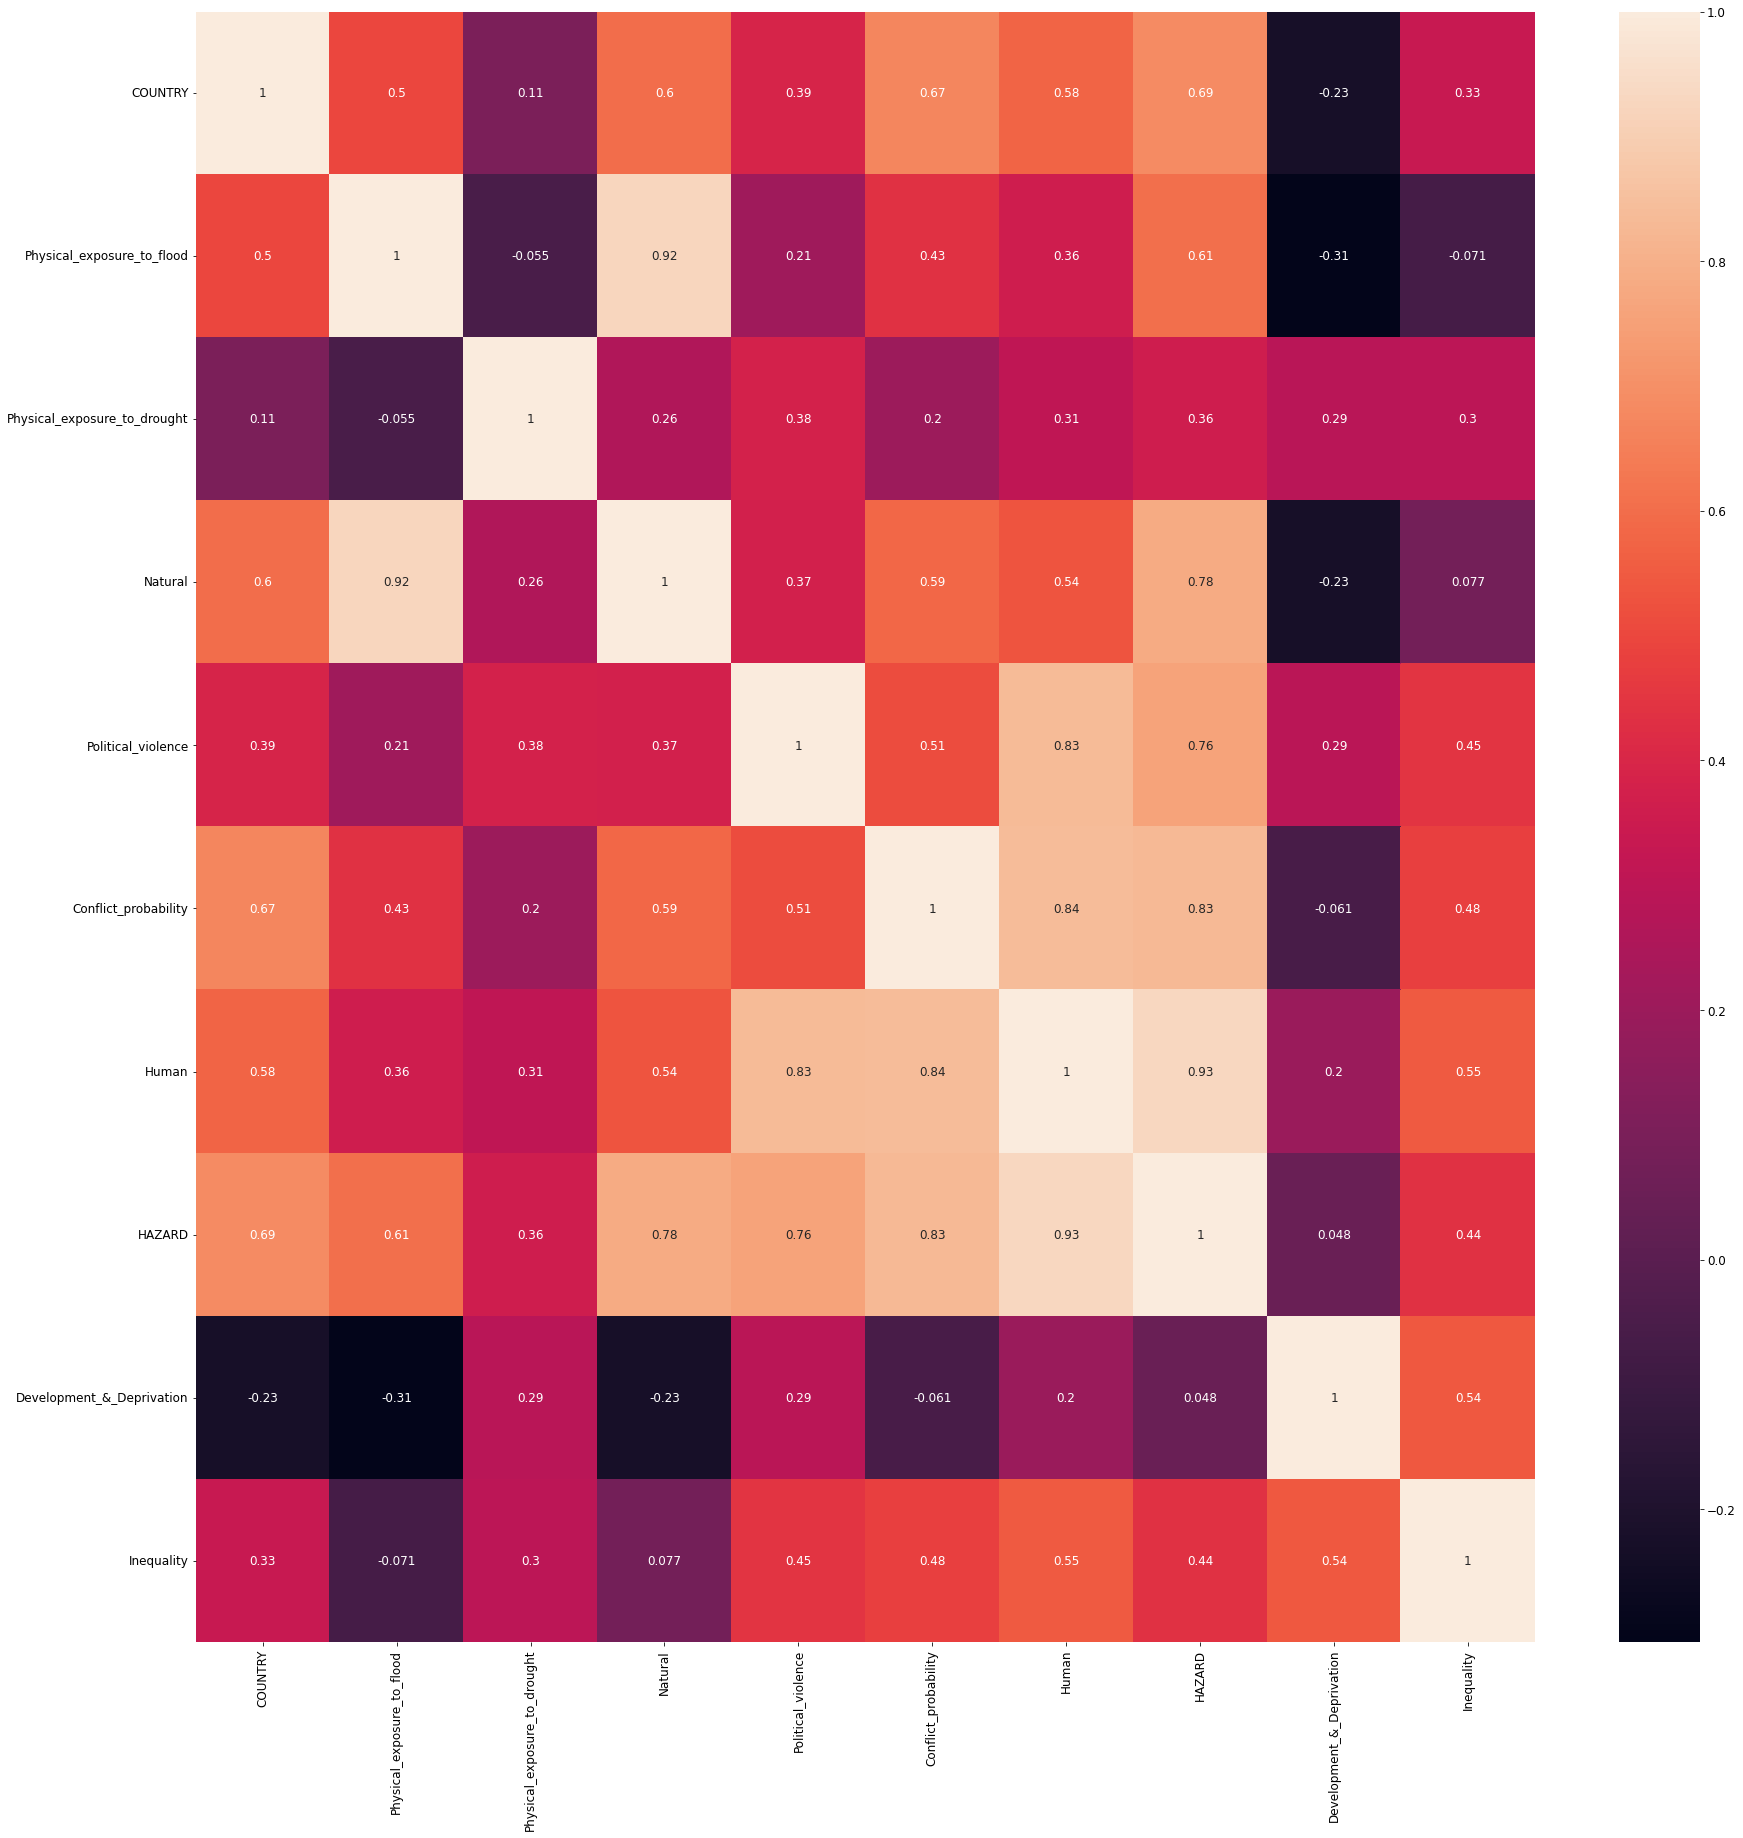

In [ ]:
# show visual representation of the correlation matrix
withinq = df.merge(df['Inequality'])
corrMatrix = withinq.corr()
plt.rcParams.update({'font.size': 12,'figure.figsize':(30,30)})
f3 = sns.heatmap(corrMatrix, annot=True)
plt.show() # show plot

In [ ]:
#create a dataframe of the correlation matrix threshold of .1
corr_columns = ['Political_violence','Physical_exposure_to_flood','Development_&_Deprivation','Conflict_probability','Natural','Physical_exposure_to_drought','Human']
corr_df = reg_df.filter(corr_columns, axis = 1)
corr_df.head()
# all under .3

,Political_violence,Physical_exposure_to_flood,Conflict_probability,Natural,Physical_exposure_to_drought,Human
1,3.6,-0.961053,-0.953435,4.3,-0.111942,-1.010559
2,3.6,-0.961053,-0.953435,4.3,-0.111942,-1.010559
3,3.6,-0.961053,-0.953435,4.3,-0.111942,-1.010559
4,0.3,-0.961053,-0.953435,4.3,-0.111942,-1.010559
5,0.0,-0.961053,-0.953435,4.3,-0.111942,-1.010559


#Chi Square

Next we can also use the Chi Square test to see how our expected results compare to our actual results.

In [ ]:
from scipy import stats

target=df['Inequality'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,9):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
chi_sq.sort(reverse=True)
chi_sq

[[(2330.0929953715495, 1.6481796817095481e-21), 7],
 [(2296.8216910585784, 1.2776323348792747e-19), 3],
 [(2146.958512647484, 9.113521704306539e-08), 2],
 [(1872.1109030994996, 1.6241736441752135e-24), 8],
 [(1807.7030100019806, 4.1319710966896075e-10), 1],
 [(888.6246489614875, 0.9999976169685074), 4],
 [(863.726142865042, 1.038407471579967e-56), 5],
 [(863.7261428650419, 1.038407471580027e-56), 0],
 [(805.1655017074552, 1.7484865072711665e-06), 6]]

#Conclusion


In conclusion, all of the 10 countries have a fairly high overall risk index value. The correlation between the natural risk and exposure to flooding is an example of a strong relationship between two attributes. You can see that there are numerous approaches to analysing a data set like this after evaluating all these models. There is no one "optimal model," and different models have different information based on the situation. However, I think the Knn and SVM measures the Inequality variable the most correctly for our purposes. It provides you with a range of useful details about the data set. In conclusion, it's possible that a combination of them all constitutes the "optimal model."
